In [2]:
import pandas as pd

#需要安装额外库：pip install chardet
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#导入数据
medal = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\medal_NOC_clean.csv')
ath = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\athlete_new_data.csv')
pro = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\pro_clean.csv')
host = pd.read_csv(r"D:\VScode\AllCode\美赛\2025\data\2025_Problem_C_Data\2025_Problem_C_Data\summerOly_hosts.csv")
medal = medal.drop(columns=["Unnamed: 0"])
pro = pro.drop(columns=["Unnamed: 0"])

#删除1906年的运动员数据
ath = ath[ath["Year"] != "1906"]
#删除冰雪运动的运动员
ath = ath[~ath["Sport"].isin(["Skating","Ice Hockey"])]
ath = ath.rename(columns ={"NOC":"RNOC"})
#过程中发现ath中的art alpinism aeronautics项目已经不存在了，并且没有在pro数据集中记录
#所以删除ath中有关数据
ath = ath[~ath["Sport"].isin(["Art Competitions","Alpinism","Aeronautics"])]
host = host.drop([5,11,12])

In [4]:
host

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"
8,1928,"Amsterdam, Netherlands"
9,1932,"Los Angeles, United States"
10,1936,"Berlin, Germany"


In [5]:
host_series = host["Host"].unique()
# 国家对应的 NOC 映射字典
noc_mapping = {
    'Greece': 'GRE',
    'France': 'FRA',
    'United States': 'USA',
    'United Kingdom': 'GBR',
    'Sweden': 'SWE',
    'Belgium': 'BEL',
    'Netherlands': 'NED',
    'Germany': 'GER',
    'Finland': 'FIN',
    'Australia': 'AUS',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Mexico': 'MEX',
    'West Germany': 'FRG',  # 西德
    'Canada': 'CAN',
    'Soviet Union': 'URS',  # 苏联
    'South Korea': 'KOR',
    'Spain': 'ESP',
    'China': 'CHN',
    'Brazil': 'BRA'
}

# 清理主办城市和国家
def clean_host(host):
    host = host.replace('\xa0', ' ')  # 替换 \xa0 为普通空格
    host = host.split('(')[0].strip()  # 去除括号内备注信息
    return host

# 获取国家名称并映射到 NOC
def map_host_to_noc(host, noc_mapping):
    host = clean_host(host)
    if ',' in host:
        country = host.split(',')[-1].strip()  # 提取国家名称
        return noc_mapping.get(country, 'UNKNOWN')  # 查找 NOC，默认返回 UNKNOWN
    return 'UNKNOWN'

# 映射所有主办城市和国家到对应的 NOC
host_noc_map = {host: map_host_to_noc(host, noc_mapping) for host in host_series}


In [6]:
host["Host"] = host["Host"].map(host_noc_map)

In [7]:
host

,Year,Host
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
6,1920,BEL
7,1924,FRA
8,1928,NED
9,1932,USA
10,1936,GER


In [8]:
medal.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year,RNOC
0,1,United States,11,7,2,20,1896,USA
1,2,Greece,10,18,19,47,1896,GRE
2,3,Germany,6,5,2,13,1896,SAA
3,4,France,5,4,2,11,1896,FRA
4,5,Great Britain,2,3,2,7,1896,GBR


In [9]:
#统计奖牌数
#USA
usa_row = host[host["Host"] == "USA"]
print(usa_row["Year"])
chn_row = host[host["Host"] == "CHN"]
print(chn_row["Year"])
fra_row = host[host["Host"] == "FRA"]
print(fra_row["Year"])
kor_row = host[host["Host"] == "KOR"]
print(kor_row["Year"])
ger_row = host[host["Host"] == "GER"]
print(ger_row["Year"])

medal_usa = medal[medal["RNOC"] == "USA"]
medal_usa_unhost = medal_usa[~medal_usa["Year"].isin([1904,1932,1984,1996])]
medal_usa_host = medal_usa[medal_usa["Year"].isin([1904,1932,1984,1996])]

medal_chn = medal[medal["RNOC"] == "CHN"]
medal_chn_unhost = medal_chn[~medal_chn["Year"].isin([2008])]
medal_chn_host = medal_chn[medal_chn["Year"].isin([2008])]

medal_fra = medal[medal["RNOC"] == "FRA"]
medal_fra_unhost = medal_fra[~medal_fra["Year"].isin([1900,1924,2024])]
medal_fra_host = medal_fra[medal_fra["Year"].isin([1900,1924,2024])]

medal_kor = medal[medal["RNOC"] == "KOR"]
medal_kor_unhost = medal_kor[~medal_kor["Year"].isin([1988])]
medal_kor_host = medal_kor[medal_kor["Year"].isin([1988])]

medal_ger = medal[medal["RNOC"] == "GER"]
medal_ger_unhost = medal_ger[~medal_ger["Year"].isin([1936])]
medal_ger_host = medal_ger[medal_ger["Year"].isin([1936])]

2     1904
9     1932
22    1984
25    1996
33    2028
Name: Year, dtype: int64
28    2008
Name: Year, dtype: int64
1     1900
7     1924
32    2024
Name: Year, dtype: int64
23    1988
Name: Year, dtype: int64
10    1936
Name: Year, dtype: int64


In [10]:
medal_usa_host

,Rank,NOC,Gold,Silver,Bronze,Total,Year,RNOC
30,1,United States,76,78,77,231,1904,USA
159,1,United States,44,36,30,110,1932,USA
586,1,United States,83,61,30,174,1984,USA
748,1,United States,44,32,25,101,1996,USA


In [11]:
mean_chnHost = medal_chn_host["Total"].mean()
mean_usaHost = medal_usa_host["Total"].mean()
mean_fraHost = medal_fra_host["Total"].mean()
mean_korHost = medal_kor_host["Total"].mean()
mean_gerHost = medal_ger_host["Total"].mean()

mean_chnUHost = medal_chn_unhost["Total"].mean()
mean_usaUHost = medal_usa_unhost["Total"].mean()
mean_fraUHost = medal_fra_unhost["Total"].mean()
mean_korUHost = medal_kor_unhost["Total"].mean()
mean_gerUHost = medal_ger_unhost["Total"].mean()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


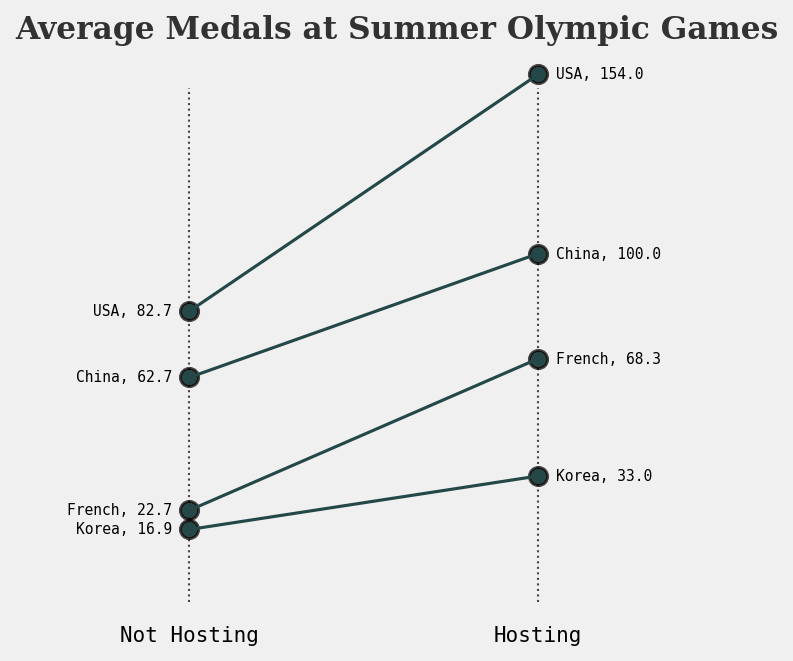

In [22]:
#绘制主办国提升图
#选择USA CHN FRA KOR GER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#-------------------------#
# 1) 构造示例数据
#   “Not Hosting”列表示该国在非主场时的平均奖牌数，
#   “Hosting”列表示该国在主场时的奖牌数。
#   行索引为国家名称。
#-------------------------#

data = {
    'Not Hosting': [mean_chnUHost,mean_usaUHost,mean_korUHost,mean_fraUHost,mean_gerUHost],
    'Hosting':     [mean_chnHost,mean_usaHost,mean_korHost,mean_fraHost,mean_gerHost]
}
countries = ["China","USA","Korea","French","Germany"]

sample = pd.DataFrame(data, index=countries)

#-------------------------#
# 2) 准备可视化所需的颜色、背景等
#-------------------------#
background_color = '#F0F0F0'  # 淡灰色背景，可根据需求更改
low_c = '#B73832'
high_c = '#244747'

#high_c = '#3498DB'  # 浅蓝


# 线两端的文字标签（可根据需要修改格式）
left_label = [f"{c}, {round(y,1)}" for c, y in zip(sample.index, sample["Not Hosting"])]
right_label = [f"{c}, {round(y,1)}" for c, y in zip(sample.index, sample["Hosting"])]

# 根据差值来设定线的颜色（示例：如果 Not Hosting < Hosting，则用 high_c，否则用 low_c）
klass = [
    low_c if (y1 - y2) > 0 else high_c
    for y1, y2 in zip(sample["Not Hosting"], sample["Hosting"])
]

#-------------------------#
# 3) 画线的函数
#   https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
#-------------------------#
def newline(p1, p2):
    ax = plt.gca()
    # 根据差值设置颜色
    color = low_c if p1[1] - p2[1] > 0 else high_c
    l = mlines.Line2D(
        [p1[0], p2[0]],
        [p1[1], p2[1]],
        color=color,
        marker='o',
        markersize=6
    )
    ax.add_line(l)
    return l

#-------------------------#
# 4) 创建画布并绘图
#-------------------------#
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color)

# 在 x=1 和 x=3 位置各自画竖线，以便作为视觉参考
ax.vlines(
    x=1, ymin=-5, ymax=150,
    color='black', alpha=0.7,
    linewidth=1, linestyles='dotted'
)
ax.vlines(
    x=3, ymin=-5, ymax=150,
    color='black', alpha=0.7,
    linewidth=1, linestyles='dotted'
)

# 绘制左右两侧的散点
ax.scatter(
    x=np.repeat(1, sample.shape[0]),
    y=sample["Not Hosting"],
    s=75, linewidth=1.5,
    color='black', alpha=0.7
)
ax.scatter(
    x=np.repeat(3, sample.shape[0]),
    y=sample["Hosting"],
    s=75, linewidth=1.5,
    color='black', alpha=0.7
)

# 绘制连接 line segment，并在左右添加标签
for p1, p2, country in zip(sample["Not Hosting"], sample["Hosting"], sample.index):
    # p1, p2 分别是 y 值，x 固定为 1 和 3
    newline([1, p1], [3, p2])
    # 在左边标注
    ax.text(
        1 - 0.1,
        p1,
        f"{country}, {round(p1,1)}",
        horizontalalignment='right',
        verticalalignment='center',
        fontdict={'size': 7}
    )
    # 在右边标注
    ax.text(
        3 + 0.1,
        p2,
        f"{country}, {round(p2,1)}",
        horizontalalignment='left',
        verticalalignment='center',
        fontdict={'size': 7}
    )

# 图表标题
ax.text(
    0,
    1.07 * sample.max().max(),
    "Average Medals at Summer Olympic Games",
    fontsize=15,
    fontweight='bold',
    fontfamily='serif',
    color='#323232'
)

# 设定坐标范围
ax.set(
    xlim=(0, 4),
    ylim=(-10, sample.max().max() + 10),
    ylabel=''
)
ax.set_xticks([1, 3])
ax.set_xticklabels(["Not Hosting", "Hosting"], fontsize=10)

# 隐藏四周的边框
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='both', which='both', length=0, labelleft=False)
plt.rcParams["font.family"] = "monospace"

plt.show()
